In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, f_oneway, shapiro
# import warnings

# warnings.filterwarnings("ignore")

%matplotlib inline

### Feature Information
1. App: Name of the App
2. Category: Category under which the App falls.
3. Rating: Application's rating on play store.
4. Reviews: Number of reviews of the App.
5. Size: Size of the App.
6. Install: Number of Installs of the App.
7. Type: If the App is free/paid.
8. Price: Price of the app (0 if it is Free).
9. Content Rating: Appropriate Target Audience of the App.
10. Genres: Genre under which the App falls.
11. last_updated_year: The year when the App was last updated.
12. Current Ver: Current Version of the Application.
13. Android Ver: Minimum Android Version required to run the App

In [72]:
df = pd.read_csv('data/google_cleaned.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_updated_day,last_updated_month,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [73]:
df.describe()

,Rating,Reviews,Size,Installs,Price,last_updated_day,last_updated_month,last_updated_year
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368,15.609041,6.422325,2017.399723
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703,9.561621,2.578388,1.100914
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,1.000000,2010.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000,6.000000,5.000000,2017.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,31.000000,12.000000,2018.000000


In [74]:
# Found the same application has duplicates
print('Has duplicates' if len(df.duplicated('App').unique()) > 1 else 'No Duplicates')

# Observed 1181 cases of duplicated rows
print("number of duplicates:", df[df.duplicated('App')].shape[0])

# Drop duplicates
df = df.drop_duplicates(subset=['App'], keep='first')

print('Has duplicates' if len(df.duplicated('App').unique()) > 1 else 'No Duplicates')



Has duplicates
number of duplicates: 1181
No Duplicates


In [75]:
## Features map by type 

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: \n{}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: \n{}'.format(len(categorical_features), categorical_features))

We have 8 numerical features: 
['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'last_updated_day', 'last_updated_month', 'last_updated_year']
We have 7 categorical features: 
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


<Figure size 640x480 with 0 Axes>

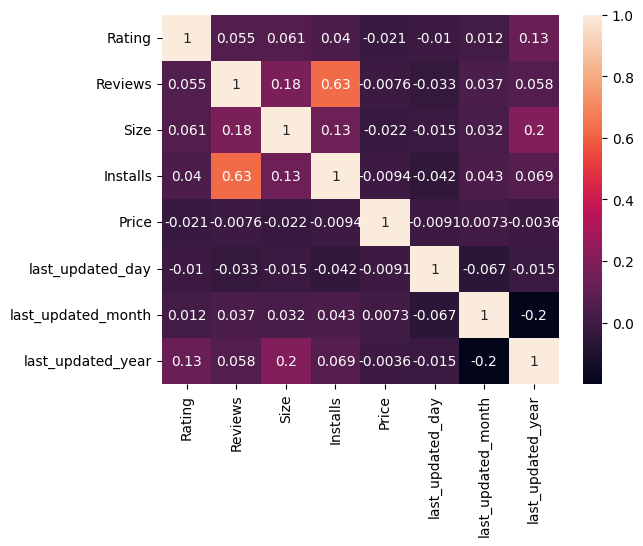

<Figure size 640x480 with 0 Axes>

In [76]:
## Check numeric features correlations
numerical_df = df.select_dtypes(include=['number'])
# print(numerical_df.corr())

sns.heatmap(numerical_df.corr(),annot=True)
plt.figure()

The number of reviews shows a moderate positive correlation with the number of installs (𝑟=0.63).
This aligns with the expectation that apps with more installs tend to attract more reviews, as a larger user base increases the likelihood of user engagement.

Other Observed Correlations:
Last Update Year vs. App Size: 
A weak positive correlation is observed (r=0.20), indicating that apps updated more recently tend to have slightly larger file sizes. 
This could reflect the addition of new features or enhanced functionality over time.

Last Update Year vs. App Rating: 
A weak positive correlation is also noted (r=0.13), suggesting that apps updated more frequently tend to have slightly higher ratings.

These findings imply that apps with regular updates may invest more in quality improvements, which could lead to both increased size and better user experiences, as reflected in higher ratings.

Potential Confounding Factor:
The relationship between last update year, app size, and ratings might be influenced by a third variable: investment level. Apps that are actively maintained with frequent updates are likely to receive greater investment in development and user experience, which can lead to higher ratings and larger file sizes.

Future: It may be insightful to explore how the observed correlations vary across different levels of app ratings. For example, stratifying the data into categories such as low-rated apps (rating < 3.0), moderately-rated apps (3.0 ≤ rating < 4.5), and highly-rated apps (rating ≥ 4.5) could reveal nuanced relationships between variables like number of installs, number of reviews, and last update year.

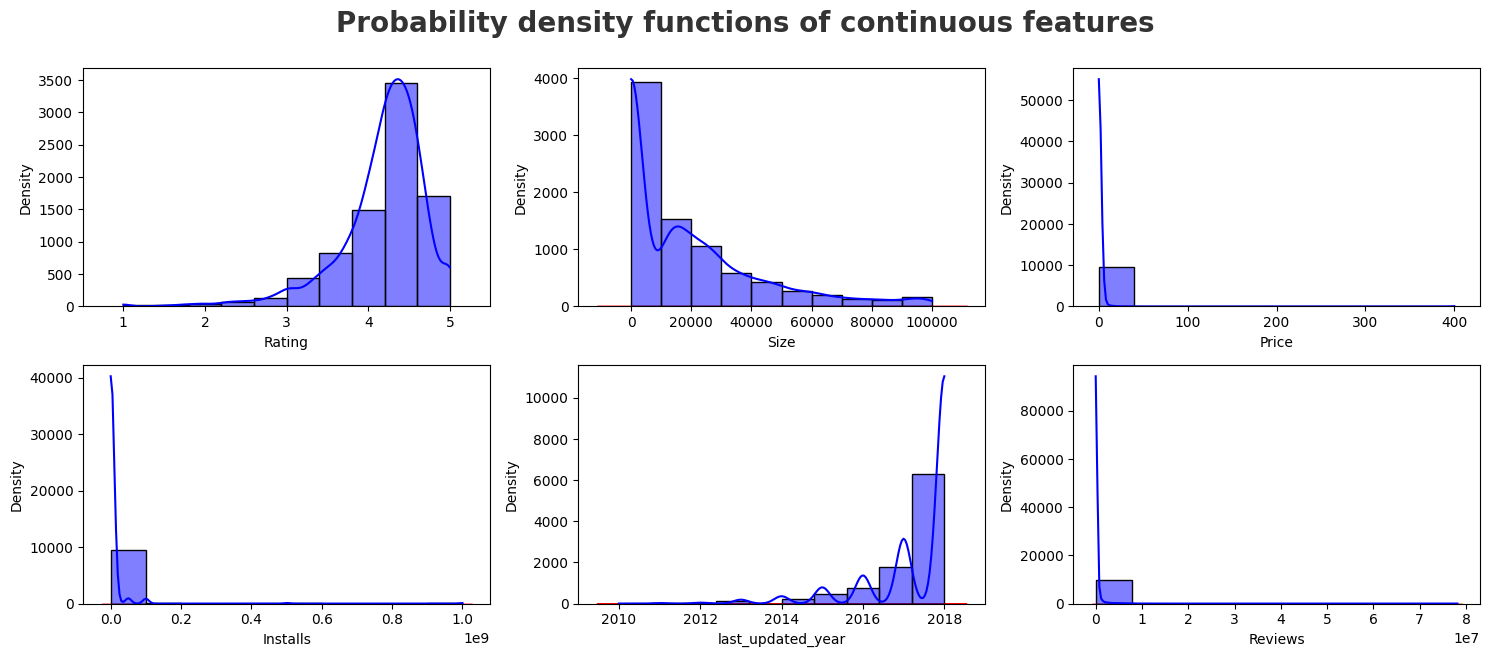

In [77]:
## Proportion of count data on continuous features (or quasi-continuous)

plt.figure(figsize=(15, 15))
plt.suptitle('Probability density functions of continuous features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

columns = ['Rating', 'Size', 'Price', 'Installs', 'last_updated_year', 'Reviews']

for i in range(0, len(columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[columns[i]],fill=True, color='r')
    sns.histplot(df[columns[i]], kde=True, bins=10, color='blue')
    plt.xlabel(columns[i])
    plt.tight_layout()

Ratings: Most apps are rated between 4.0 and 5.0, indicating a strong bias toward high ratings.

Size: App sizes predominantly range from 1kB to 20MB, with outliers likely reflecting larger apps.

Price: Apps are mostly free or cost only a few dollars, consistent with the freemium pricing model.

Installs: The majority of apps are installed only a few times, with fewer apps achieving widespread adoption.

Last Updated Year: A significant portion of apps in the dataset were last updated in 2018, suggesting either dataset collection bias.

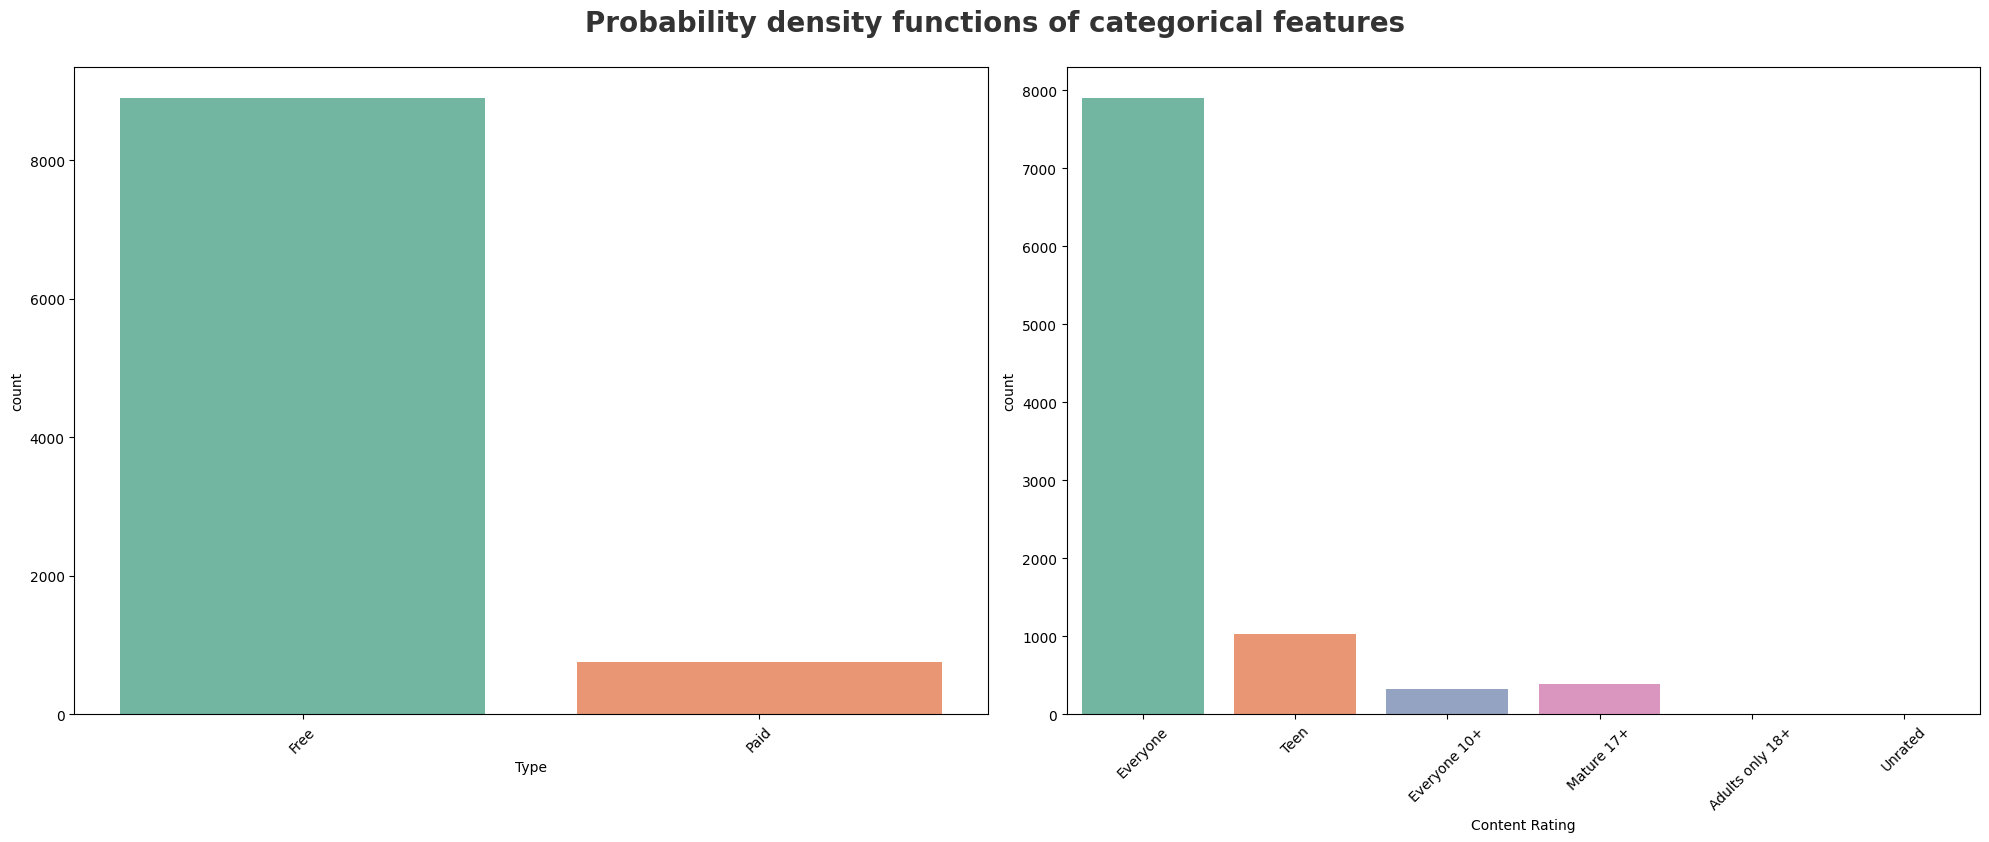

In [78]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Probability density functions of categorical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]], hue=df[category[i]], palette="Set2", legend=False)
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

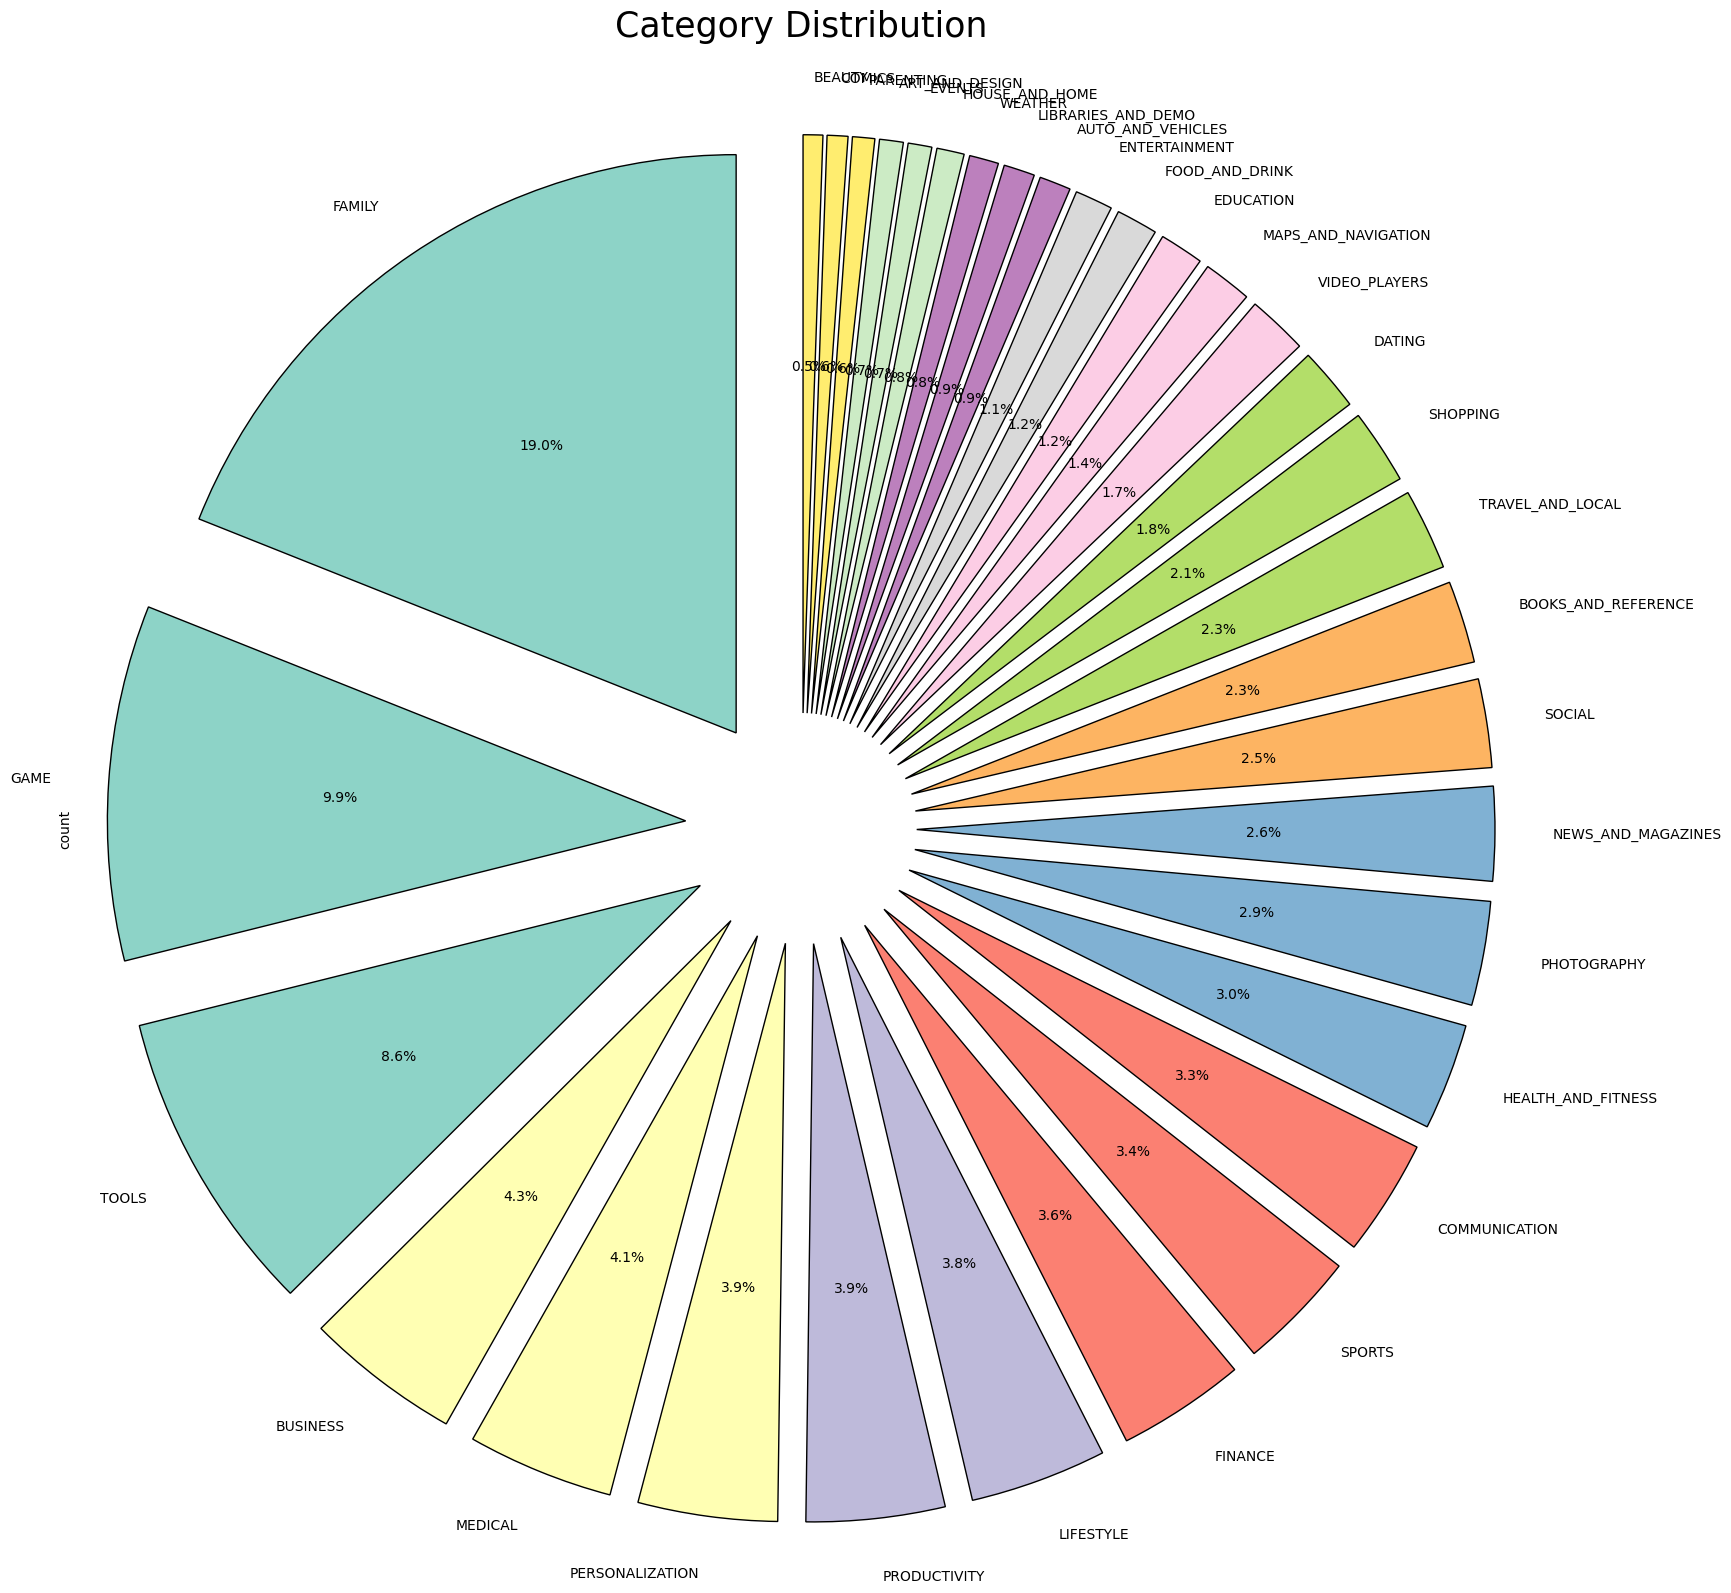

In [79]:
# Plotting the pie chart for the 'Category' column
category_counts = df['Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(20, 16))
category_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,      # Start the plot at the top
    explode=[0.2] * len(category_counts),  # Slightly explode each slice (optional)
    cmap='Set3',
    labels=category_counts.index, 
    legend=False,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Add title
plt.title("Category Distribution", fontsize=25, pad=50)

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits properly
plt.show()

# Most of the apps in the dataset are from the family category, game and tools are right after.

         Category      Installs
14           GAME  13878.924415
6   COMMUNICATION  11038.276251
29          TOOLS   8001.771915
25   PRODUCTIVITY   5793.091369
27         SOCIAL   5487.867902


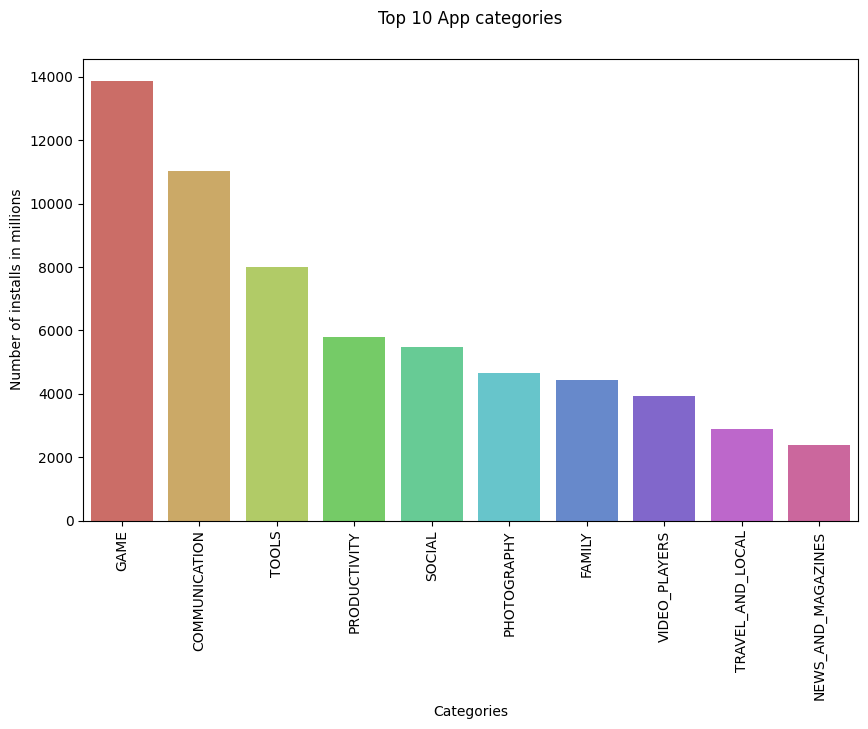

In [80]:
## Top 10 App Installs
category = pd.DataFrame(df['Installs'].groupby(df['Category']).sum()).reset_index().sort_values(['Installs'], ascending=False)
category['Installs'] = category['Installs'] / 1000000
print(category.head())
plt.figure(figsize=(10,6))
sns.barplot(y ='Installs', x='Category', hue='Category', data = category[:10], palette='hls', legend=False)
plt.title('Top 10 App categories', pad=25)
plt.xticks(rotation=90)
plt.ylabel('Number of installs in millions')
plt.xlabel('Categories')
plt.show()
# Most of the apps being installed are from the game category. communication and tools are second and third.

Reviews not numbers: 0
Rating not numbers 1463
Not numbers in Rating [False  True]
The correlation between rating and number of reviews doesn't exists in first sight 0.055
significance: 6.050594023652058e-07
               Category    Reviews
0                  GAME  622295937
1         COMMUNICATION  285810907
2                 TOOLS  229355702
3                SOCIAL  227927470
4                FAMILY  143822304
5           PHOTOGRAPHY  105351227
6         VIDEO_PLAYERS   67484072
7          PRODUCTIVITY   55590391
8       PERSONALIZATION   53542755
9              SHOPPING   44551541
10               SPORTS   35348212
11        ENTERTAINMENT   34762650
12     TRAVEL_AND_LOCAL   26819594
13   NEWS_AND_MAGAZINES   23129264
14   HEALTH_AND_FITNESS   21361234
15  MAPS_AND_NAVIGATION   17728954
16  BOOKS_AND_REFERENCE   16720905
17            EDUCATION   13363372
18              FINANCE   12661784
19              WEATHER   12295124
20            LIFESTYLE   11831656
21             BUSINES

/var/folders/fv/k79211k13lqcyqdk75q92xq00000gn/T/ipykernel_11600/2029194021.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_correlation = df.groupby('Category').apply(lambda group: group['Reviews'].corr(group['Rating']))


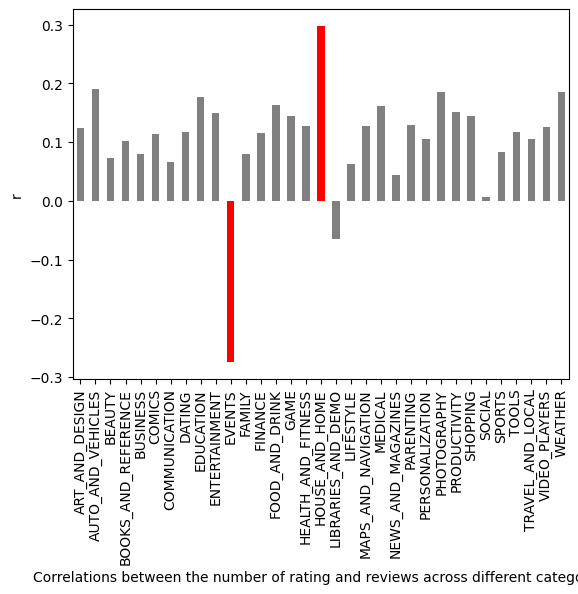

House and Home: r = 0.298, p = 1.878e-02
Events: r = -0.274, p = 6.803e-02


In [81]:
print('Reviews not numbers:', df['Reviews'].isna().sum())  # Check NaNs in Reviews
print('Rating not numbers', df['Rating'].isna().sum())  # Check NaNs in Rating

print('Not numbers in Rating', df['Rating'].isna().unique())  # Check NaNs in Rating -> True and False Values

# Removing the rows
df = df.dropna(subset=['Rating'])


# Overall correlation
corr, pval = pearsonr(df['Reviews'], df['Rating'])

print("The correlation between rating and number of reviews doesn't exists in first sight", round(corr, 3))
print("significance:", pval) # p ≥ 0.05: No significant correlation exists.


df_cat_rating = df.groupby(['Category'])['Rating'].sum().sort_values(ascending = False).reset_index()
df_cat_reviews = df.groupby(['Category'])['Reviews'].sum().sort_values(ascending = False).reset_index()
# Most reviews are on apps from the game category, as they also the most ones being installed. 

print(df_cat_reviews)
# The correlation between the rating and reviews across different categories
grouped_correlation = df.groupby('Category').apply(lambda group: group['Reviews'].corr(group['Rating']))
# print(grouped_correlation)

colors = ['grey' if (-0.2 < x < 0.2) else 'red' for x in grouped_correlation ]

grouped_correlation.plot(kind='bar', color=colors)
plt.xlabel("Correlations between the number of rating and reviews across different categories", loc='center')
plt.ylabel("r")
plt.show()

# Filter data for each category
house_data = df[df['Category'] == 'HOUSE_AND_HOME']
events_data = df[df['Category'] == 'EVENTS']

# Compute Pearson correlation and p-value
house_corr, house_pval = pearsonr(house_data['Reviews'], house_data['Rating'])
events_corr, events_pval = pearsonr(events_data['Reviews'], events_data['Rating'])

print(f"House and Home: r = {house_corr:.3f}, p = {house_pval:.3e}")
print(f"Events: r = {events_corr:.3f}, p = {events_pval:.3e}")
# The correlations are moderate (positively for house and home and negatively for events) but it is not significant.

In [82]:
df_cat_reviews = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
print(df_cat_reviews.head())
# Most reviews are on apps from the game category, as they also the most ones being installed.

# Group installs by category
installs_groups = [group['Installs'].values for _, group in df.groupby('Category')]
reviews_groups = [group['Reviews'].values for _, group in df.groupby('Category')]
rating_groups = [group['Rating'].values for _, group in df.groupby('Category')]

# Installs Normality Check
stat, p_value = shapiro(df['Installs'])
print(f"Shapiro-Wilk Test: W = {stat:.3f}, p = {p_value:.3e}")


        Category     Installs
0           GAME  13878762717
1  COMMUNICATION  11038241530
2          TOOLS   7999724500
3   PRODUCTIVITY   5793070180
4         SOCIAL   5487841475
Shapiro-Wilk Test: W = 0.123, p = 3.314e-106


/Users/orikanner/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8196.
  res = hypotest_fun_out(*samples, **kwds)


In [83]:
# Prepare df
selected_columns = ['Rating', 'Category', 'Type', 'Genres', 'Size', 'Price', 'last_updated_year', 'Installs', 'Reviews']
df_predict = df[selected_columns].copy()

df_predict = pd.get_dummies(df_predict, columns=['Category'], drop_first=True)  # One-hot encoding to Category
df_predict = pd.get_dummies(df_predict, columns=['Type'], drop_first=True)  # One-hot encoding to Type
df_predict = pd.get_dummies(df_predict, columns=['Genres'], drop_first=True)  # One-hot encoding to Type
df_predict.head(3)

,Rating,Size,Price,last_updated_year,Installs,Reviews,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,19000.0,0.0,2018,10000,159,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,14000.0,0.0,2018,500000,967,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,8.7,0.0,2018,5000000,87510,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
from sklearn.preprocessing import StandardScaler

# Scale continuous variables like Number of Reviews to avoid dominance by larger values.
scaler = StandardScaler()
df_predict[['Reviews', 'Installs']] = scaler.fit_transform(df[['Reviews', 'Installs']])
df_predict = df_predict.dropna()

X = df_predict.drop(['Rating'], axis=1)  # Features
y = df_predict['Rating']                # Target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
coefficients = coefficients.sort_values('Importance', ascending=False)
print(coefficients)

Mean Squared Error: 0.317
R² Score: 0.037
                                        Feature  Importance
54                    Genres_Board;Pretend Play    0.707321
98            Genres_Health & Fitness;Education    0.669981
89              Genres_Entertainment;Creativity    0.482777
133              Genres_Simulation;Pretend Play    0.453987
121                     Genres_Puzzle;Education    0.439634
..                                          ...         ...
97   Genres_Health & Fitness;Action & Adventure   -0.258744
48             Genres_Art & Design;Pretend Play   -0.302727
112                  Genres_Parenting;Education   -0.336055
111                Genres_Parenting;Brain Games   -0.337033
83                Genres_Educational;Creativity   -0.724584

[151 rows x 2 columns]
